# Task 1.2: Initial Data Exploration

**Objective**: Explore the 2024 HMDA dataset to understand its structure, data types, and quality

**Tasks**:
- Load dataset and inspect dimensions
- Review HMDA data dictionary columns
- Check data types and missing values
- Generate comprehensive data profile report

**Expected Output**: `reports/loan_data_profile_report.html`

## Setup

In [25]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [26]:
# Set up paths
import os
print(f"Current working directory: {os.getcwd()}")

# Use absolute paths to avoid issues
BASE_DIR = Path('/Users/josiahgordor/Desktop/DSPortfolio/Projects/loan_approval')
DATA_RAW = BASE_DIR / 'data' / 'raw'
DATA_PROCESSED = BASE_DIR / 'data' / 'processed'
REPORTS = BASE_DIR / 'reports'

# Create directories if they don't exist
DATA_PROCESSED.mkdir(parents=True, exist_ok=True)
REPORTS.mkdir(parents=True, exist_ok=True)

print(f"Data raw path: {DATA_RAW}")
print(f"Data raw exists: {DATA_RAW.exists()}")
print(f"✅ Directory structure verified")

Current working directory: /Users/josiahgordor/Desktop/DSPortfolio/Projects/loan_approval
Data raw path: /Users/josiahgordor/Desktop/DSPortfolio/Projects/loan_approval/data/raw
Data raw exists: True
✅ Directory structure verified


## 1. Load Dataset

In [27]:
# Load HMDA data
data_path = DATA_RAW / 'hdma_loan_data_2024.csv'

print(f"Loading data from: {data_path}")
print("⏳ This may take a moment for large files...\n")

# For initial exploration, let's load a sample first to understand structure
# Read first 100k rows for quick exploration
print("Loading sample (first 100,000 rows) for initial exploration...")
df_sample = pd.read_csv(data_path, nrows=100000, low_memory=False)

print(f"✅ Sample loaded successfully!")
print(f"\nSample Shape: {df_sample.shape}")
print(f"Number of Rows: {df_sample.shape[0]:,}")
print(f"Number of Columns: {df_sample.shape[1]}")
print(f"Memory Usage: {df_sample.memory_usage(deep=True).sum() / 1e6:.1f} MB")

# Now let's also get the full count without loading everything
print("\n" + "="*60)
print("Checking full dataset size...")
line_count = sum(1 for _ in open(data_path)) - 1  # Subtract header
print(f"Total rows in full dataset: {line_count:,}")
print("="*60)

# For Task 1.2, we'll work with the sample
# Full dataset will be used in later tasks
df = df_sample.copy()

Loading data from: /Users/josiahgordor/Desktop/DSPortfolio/Projects/loan_approval/data/raw/hdma_loan_data_2024.csv
⏳ This may take a moment for large files...

Loading sample (first 100,000 rows) for initial exploration...
✅ Sample loaded successfully!

Sample Shape: (100000, 101)
Number of Rows: 100,000
Number of Columns: 101
Memory Usage: 493.3 MB

Checking full dataset size...
Total rows in full dataset: 12,234,473


## 2. Initial Inspection

In [28]:
# Display first few rows
print("First 5 rows of the dataset:\n")
df.head()

First 5 rows of the dataset:



,Unnamed: 0,Activity_Year,Lei,Derived_Msa_Md,State_Code,County_Code,Census_Tract,Lien Status,Total Units,Construction Method,...,Denial_Reason_2,Denial_Reason_3,Denial_Reason_4,Tract_Population,Tract_Minority_Population_Percent,Ffiec_Msa_Md_Median_Family_Income,Tract_To_Msa_Income_Percentage,Tract_Owner_Occupied_Units,Tract_One_To_Four_Family_Homes,Tract_Median_Age_Of_Housing_Units
0,0,2024,549300DD4R4SYK5RAQ92,34980,TN,47043.0,47043060502,First Lien,Single Family (1-4 Units),Site-Built,...,NaN,NaN,NaN,3376,18.72,101700,8.8,762,1137,48
1,1,2024,549300DD4R4SYK5RAQ92,99999,WV,54109.0,54109002902,First Lien,Single Family (1-4 Units),Manufactured,...,Debt-to-income ratio,NaN,NaN,3536,3.22,67600,10.3,1146,1647,38
2,2,2024,549300DD4R4SYK5RAQ92,16700,SC,45019.0,45019004902,First Lien,Single Family (1-4 Units),Site-Built,...,NaN,NaN,NaN,2509,5.58,105100,18.5,1022,2103,32
3,3,2024,549300DD4R4SYK5RAQ92,24660,NC,37081.0,37081017102,First Lien,Single Family (1-4 Units),Site-Built,...,NaN,NaN,NaN,2366,36.22,80700,10.5,728,943,41
4,4,2024,549300DD4R4SYK5RAQ92,31084,CA,6037.0,6037265306,First Lien,Single Family (1-4 Units),Site-Built,...,NaN,NaN,NaN,2081,57.42,98200,0.0,17,79,49


In [29]:
# Display last few rows
print("Last 5 rows of the dataset:\n")
df.tail()

Last 5 rows of the dataset:



,Unnamed: 0,Activity_Year,Lei,Derived_Msa_Md,State_Code,County_Code,Census_Tract,Lien Status,Total Units,Construction Method,...,Denial_Reason_2,Denial_Reason_3,Denial_Reason_4,Tract_Population,Tract_Minority_Population_Percent,Ffiec_Msa_Md_Median_Family_Income,Tract_To_Msa_Income_Percentage,Tract_Owner_Occupied_Units,Tract_One_To_Four_Family_Homes,Tract_Median_Age_Of_Housing_Units
99995,99995,2024,B4TYDEB6GKMZO031MB27,12054,GA,13113.0,13113140203,First Lien,Single Family (1-4 Units),Site-Built,...,NaN,NaN,NaN,6367,44.76,100900,15.3,1954,2364,26
99996,99996,2024,B4TYDEB6GKMZO031MB27,40900,CA,6067.0,6067009608,Subordinate Lien,Single Family (1-4 Units),Site-Built,...,NaN,NaN,NaN,10056,87.75,113700,8.2,1470,2153,17
99997,99997,2024,B4TYDEB6GKMZO031MB27,22220,AR,5143.0,5143011005,First Lien,Single Family (1-4 Units),Site-Built,...,NaN,NaN,NaN,4463,17.01,94400,9.9,1340,1607,27
99998,99998,2024,B4TYDEB6GKMZO031MB27,99999,VA,51109.0,51109950102,First Lien,Single Family (1-4 Units),Site-Built,...,NaN,NaN,NaN,4985,24.77,73900,11.4,1482,2569,28
99999,99999,2024,B4TYDEB6GKMZO031MB27,99999,NaN,NaN,0,First Lien,Single Family (1-4 Units),Site-Built,...,NaN,NaN,NaN,0,0.00,0,0.0,0,0,0


In [30]:
# Column names
print(f"Total Columns: {len(df.columns)}\n")
print("Column Names:")
print("=" * 60)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

Total Columns: 101

Column Names:
 1. Unnamed: 0
 2. Activity_Year
 3. Lei
 4. Derived_Msa_Md
 5. State_Code
 6. County_Code
 7. Census_Tract
 8. Lien Status
 9. Total Units
10. Construction Method
11. Conforming_Loan_Limit
12. Derived_Ethnicity
13. Derived_Race
14. Derived_Sex
15. Action_Taken
16. Purchaser_Type
17. Preapproval
18. Loan_Type
19. Loan_Purpose
20. Lien_Status
21. Reverse_Mortgage
22. Open_End_Line_Of_Credit
23. Business_Or_Commercial_Purpose
24. Loan_Amount
25. Combined_Loan_To_Value_Ratio
26. Interest_Rate
27. Rate_Spread
28. Hoepa_Status
29. Total_Loan_Costs
30. Total_Points_And_Fees
31. Origination_Charges
32. Discount_Points
33. Lender_Credits
34. Loan_Term
35. Prepayment_Penalty_Term
36. Intro_Rate_Period
37. Negative_Amortization
38. Interest_Only_Payment
39. Balloon_Payment
40. Other_Nonamortizing_Features
41. Property_Value
42. Construction_Method
43. Occupancy_Type
44. Manufactured_Home_Secured_Property_Type
45. Manufactured_Home_Land_Property_Interest
46. Tota

In [31]:
# Data types summary
print("Data Types Summary:")
print("=" * 60)
print(df.dtypes.value_counts())
print("\nDetailed Info:")
df.info(verbose=True, show_counts=True)

Data Types Summary:
object     74
int64      15
float64    12
Name: count, dtype: int64

Detailed Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 101 columns):
 #    Column                                    Non-Null Count   Dtype  
---   ------                                    --------------   -----  
 0    Unnamed: 0                                100000 non-null  int64  
 1    Activity_Year                             100000 non-null  int64  
 2    Lei                                       100000 non-null  object 
 3    Derived_Msa_Md                            100000 non-null  int64  
 4    State_Code                                97796 non-null   object 
 5    County_Code                               97670 non-null   float64
 6    Census_Tract                              100000 non-null  int64  
 7    Lien Status                               100000 non-null  object 
 8    Total Units                               100000 

## 3. Basic Statistics

In [32]:
# Descriptive statistics for numeric columns
print("Descriptive Statistics (Numeric Columns):\n")
df.describe()

Descriptive Statistics (Numeric Columns):



,Unnamed: 0,Activity_Year,Derived_Msa_Md,County_Code,Census_Tract,Loan_Amount,Combined_Loan_To_Value_Ratio,Interest_Rate,Rate_Spread,Total_Loan_Costs,...,Property_Value,Income,Co_Applicant_Ethnicity_5,Tract_Population,Tract_Minority_Population_Percent,Ffiec_Msa_Md_Median_Family_Income,Tract_To_Msa_Income_Percentage,Tract_Owner_Occupied_Units,Tract_One_To_Four_Family_Homes,Tract_Median_Age_Of_Housing_Units
count,100000.000000,100000.0,100000.000000,97670.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,...,1.000000e+05,100000.000000,0.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,49999.500000,2024.0,34863.977740,25405.047312,2.481268e+10,2.738166e+05,45.822076,3.185145,0.418436,1398.253387,...,5.309037e+05,274.071100,NaN,4840.857080,42.820157,104727.458000,11.525169,1200.136530,1580.185140,35.56904
std,28867.657797,0.0,20989.728384,16401.841699,1.665672e+10,5.024197e+05,37.761680,3.732615,0.976220,4562.598420,...,2.665007e+06,4325.833249,NaN,2221.486881,27.325301,28563.476854,5.101144,613.802117,730.009359,19.47203
min,0.000000,2024.0,10180.000000,1001.000000,0.000000e+00,5.000000e+03,0.000000,0.000000,-7.209000,0.000000,...,0.000000e+00,-10209.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,24999.750000,2024.0,19740.000000,12011.000000,9.170190e+09,6.500000e+04,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,59.000000,NaN,3491.000000,20.320000,90200.000000,8.300000,780.000000,1122.000000,21.00000
50%,49999.500000,2024.0,33124.000000,24033.000000,2.402175e+10,1.450000e+05,52.350000,0.000000,0.000000,0.000000,...,3.650000e+05,105.000000,NaN,4640.000000,36.660000,101300.000000,11.000000,1152.000000,1538.000000,35.00000
75%,74999.250000,2024.0,40900.000000,39061.000000,3.903510e+10,3.050000e+05,75.510000,6.990000,0.252000,0.000000,...,6.550000e+05,185.000000,NaN,5955.000000,63.120000,116900.000000,14.200000,1561.000000,1996.000000,50.00000
max,99999.000000,2024.0,99999.000000,56039.000000,5.603997e+10,3.000500e+07,999.999000,13.375000,6.210000,128170.380000,...,6.520850e+08,717000.000000,NaN,30199.000000,100.000000,201300.000000,41.200000,6276.000000,8233.000000,80.00000


In [33]:
# Descriptive statistics for categorical columns
print("Descriptive Statistics (Categorical Columns):\n")
df.describe(include=['object'])

Descriptive Statistics (Categorical Columns):



,Lei,State_Code,Lien Status,Total Units,Construction Method,Conforming_Loan_Limit,Derived_Ethnicity,Derived_Race,Derived_Sex,Action_Taken,...,Initially_Payable_To_Institution,Aus_1,Aus_2,Aus_3,Aus_4,Aus_5,Denial_Reason_1,Denial_Reason_2,Denial_Reason_3,Denial_Reason_4
count,100000,97796,100000,100000,100000,100000,100000,100000,100000,100000,...,100000,100000,8899,3290,1,1,100000,8510,2301,248
unique,23,51,2,2,2,4,5,9,4,8,...,4,8,4,2,1,1,11,9,7,5
top,B4TYDEB6GKMZO031MB27,CA,First Lien,Single Family (1-4 Units),Site-Built,Conforming,Not Hispanic or Latino,White,Male,Loan originated,...,Initially payable to your institution,Not applicable,Internal Proprietary System,Other,Desktop Underwriter (DU),Desktop Underwriter (DU),Not applicable,Collateral,Collateral,Other
freq,82656,16322,52675,99415,99709,92463,65403,57986,35339,37609,...,95554,78278,5350,3289,1,1,64725,3076,895,119


## 4. Missing Values Analysis

In [34]:
# Calculate missing value percentage
missing_count = df.isnull().sum()
missing_pct = (missing_count / len(df) * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    'Column': missing_pct.index,
    'Missing_Count': missing_count[missing_pct.index],
    'Missing_Percentage': missing_pct.values
})

# Show columns with missing values
columns_with_missing = missing_df[missing_df['Missing_Percentage'] > 0]
print(f"Columns with Missing Values: {len(columns_with_missing)} out of {len(df.columns)}\n")
print(columns_with_missing.head(20))

Columns with Missing Values: 33 out of 101

                                                    Column  Missing_Count  \
Co_Applicant_Ethnicity_5          Co_Applicant_Ethnicity_5         100000   
Aus_4                                                Aus_4          99999   
Aus_5                                                Aus_5          99999   
Applicant_Ethnicity_5                Applicant_Ethnicity_5          99998   
Co_Applicant_Ethnicity_4          Co_Applicant_Ethnicity_4          99997   
Applicant_Ethnicity_4                Applicant_Ethnicity_4          99997   
Co_Applicant_Race_5                    Co_Applicant_Race_5          99992   
Applicant_Race_5                          Applicant_Race_5          99984   
Co_Applicant_Race_4                    Co_Applicant_Race_4          99980   
Co_Applicant_Ethnicity_3          Co_Applicant_Ethnicity_3          99961   
Applicant_Race_4                          Applicant_Race_4          99940   
Co_Applicant_Race_3             

In [35]:
# Identify columns with >40% missing (may consider dropping)
high_missing = missing_df[missing_df['Missing_Percentage'] > 40]

print(f"\n⚠️  Columns with >40% Missing Values: {len(high_missing)}")
print("=" * 60)
if len(high_missing) > 0:
    print(high_missing)
else:
    print("None - all columns have <40% missing values")


⚠️  Columns with >40% Missing Values: 25
                                                    Column  Missing_Count  \
Co_Applicant_Ethnicity_5          Co_Applicant_Ethnicity_5         100000   
Aus_4                                                Aus_4          99999   
Aus_5                                                Aus_5          99999   
Applicant_Ethnicity_5                Applicant_Ethnicity_5          99998   
Co_Applicant_Ethnicity_4          Co_Applicant_Ethnicity_4          99997   
Applicant_Ethnicity_4                Applicant_Ethnicity_4          99997   
Co_Applicant_Race_5                    Co_Applicant_Race_5          99992   
Applicant_Race_5                          Applicant_Race_5          99984   
Co_Applicant_Race_4                    Co_Applicant_Race_4          99980   
Co_Applicant_Ethnicity_3          Co_Applicant_Ethnicity_3          99961   
Applicant_Race_4                          Applicant_Race_4          99940   
Co_Applicant_Race_3               

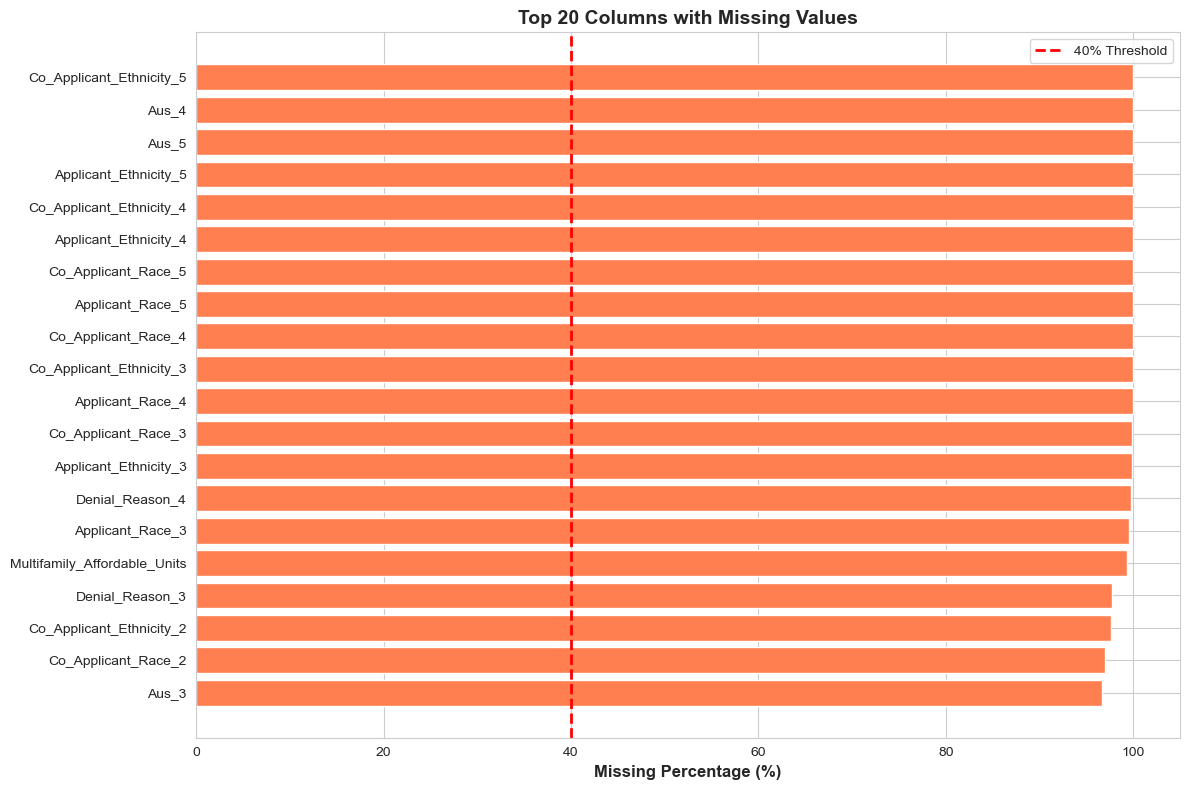

In [36]:
# Visualize missing values for top 20 columns
if len(columns_with_missing) > 0:
    plt.figure(figsize=(12, 8))
    top_missing = columns_with_missing.head(20)
    
    plt.barh(top_missing['Column'], top_missing['Missing_Percentage'], color='coral')
    plt.xlabel('Missing Percentage (%)', fontsize=12, fontweight='bold')
    plt.title('Top 20 Columns with Missing Values', fontsize=14, fontweight='bold')
    plt.axvline(x=40, color='red', linestyle='--', linewidth=2, label='40% Threshold')
    plt.legend()
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values found in the dataset!")

## 5. Key Features Exploration

Check for key underwriting features mentioned in the data dictionary

In [37]:
# Key features to look for
key_features = [
    'action_taken',          # Target variable
    'loan_amount',           # Loan amount
    'property_value',        # Property value
    'income',                # Applicant income
    'debt_to_income_ratio',  # DTI ratio
    'combined_loan_to_value_ratio',   # LTV ratio (may need to calculate)
    'interest_rate',         # Interest rate
    'rate_spread',           # Rate spread
    'loan_term',             # Loan term
    'loan_type',             # Type of loan (conventional, FHA, VA)
    'loan_purpose',          # Purpose (purchase, refinance)
    'occupancy_type',        # Occupancy type
    'property_type',         # Property type
    'state_code',              # State code
    'applicant_race_1',      # Protected attribute
    'applicant_ethnicity_1', # Protected attribute
    'applicant_sex',         # Protected attribute
    'applicant_age'          # Protected attribute
]

# Check which features are available
available_features = [f for f in key_features if f in df.columns.str.lower().tolist()]
missing_features = [f for f in key_features if f not in df.columns.str.lower().tolist()]

print(f"Available Key Features: {len(available_features)}/{len(key_features)}")
print("=" * 60)
for f in available_features:
    print(f"✅ {f}")

if missing_features:
    print(f"\n⚠️  Missing Key Features: {len(missing_features)}")
    print("=" * 60)
    for f in missing_features:
        print(f"❌ {f}")

Available Key Features: 17/18
✅ action_taken
✅ loan_amount
✅ property_value
✅ income
✅ debt_to_income_ratio
✅ combined_loan_to_value_ratio
✅ interest_rate
✅ rate_spread
✅ loan_term
✅ loan_type
✅ loan_purpose
✅ occupancy_type
✅ state_code
✅ applicant_race_1
✅ applicant_ethnicity_1
✅ applicant_sex
✅ applicant_age

⚠️  Missing Key Features: 1
❌ property_type


In [39]:
# Display summary statistics for available key features
df.columns = df.columns.str.lower()    
if available_features:
    print("\nSummary Statistics for Key Features:")
    print("=" * 60)
    display(df[available_features].describe(include='all').T)


Summary Statistics for Key Features:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
action_taken,100000,8,Loan originated,37609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount,100000.0,NaN,NaN,NaN,273816.6,502419.728733,5000.0,65000.0,145000.0,305000.0,30005000.0
property_value,100000.0,NaN,NaN,NaN,530903.65,2665006.608672,0.0,0.0,365000.0,655000.0,652085000.0
income,100000.0,NaN,NaN,NaN,274.0711,4325.833249,-10209.0,59.0,105.0,185.0,717000.0
debt_to_income_ratio,70126,20,>60%,13832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
combined_loan_to_value_ratio,100000.0,NaN,NaN,NaN,45.822076,37.76168,0.0,0.0,52.35,75.51,999.999
interest_rate,100000.0,NaN,NaN,NaN,3.185145,3.732615,0.0,0.0,0.0,6.99,13.375
rate_spread,100000.0,NaN,NaN,NaN,0.418436,0.97622,-7.209,0.0,0.0,0.252,6.21
loan_term,100000.0,NaN,NaN,NaN,350.33565,46.777842,0.0,360.0,360.0,360.0,483.0
loan_type,100000,4,Conventional (not insured or guaranteed by FHA...,97320,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 6. Target Variable Analysis

Analyze the `action_taken` column which will be our target variable

In [40]:
# Check if action_taken exists
if 'action_taken' in df.columns:
    print("Action Taken Distribution:")
    print("=" * 60)
    
    action_counts = df['action_taken'].value_counts().sort_index()
    action_pct = df['action_taken'].value_counts(normalize=True).sort_index() * 100
    
    action_summary = pd.DataFrame({
        'Count': action_counts,
        'Percentage': action_pct
    })
    
    print(action_summary)
    
    # Action codes reference
    print("\nAction Codes Reference:")
    print("=" * 60)
    print("1 = Loan originated")
    print("2 = Application approved but not accepted")
    print("3 = Application denied")
    print("4 = Application withdrawn by applicant")
    print("5 = File closed for incompleteness")
    print("6 = Purchased loan")
    print("7 = Preapproval request denied")
    print("8 = Preapproval request approved but not accepted")
else:
    print("⚠️  'action_taken' column not found in dataset!")

Action Taken Distribution:
                                               Count  Percentage
action_taken                                                    
Application approved but not accepted           1742       1.742
Application denied                             34077      34.077
Application withdrawn by applicant              7836       7.836
File closed for incompleteness                 13320      13.320
Loan originated                                37609      37.609
Preapproval request approved but not accepted   1448       1.448
Preapproval request denied                       755       0.755
Purchased loan                                  3213       3.213

Action Codes Reference:
1 = Loan originated
2 = Application approved but not accepted
3 = Application denied
4 = Application withdrawn by applicant
5 = File closed for incompleteness
6 = Purchased loan
7 = Preapproval request denied
8 = Preapproval request approved but not accepted


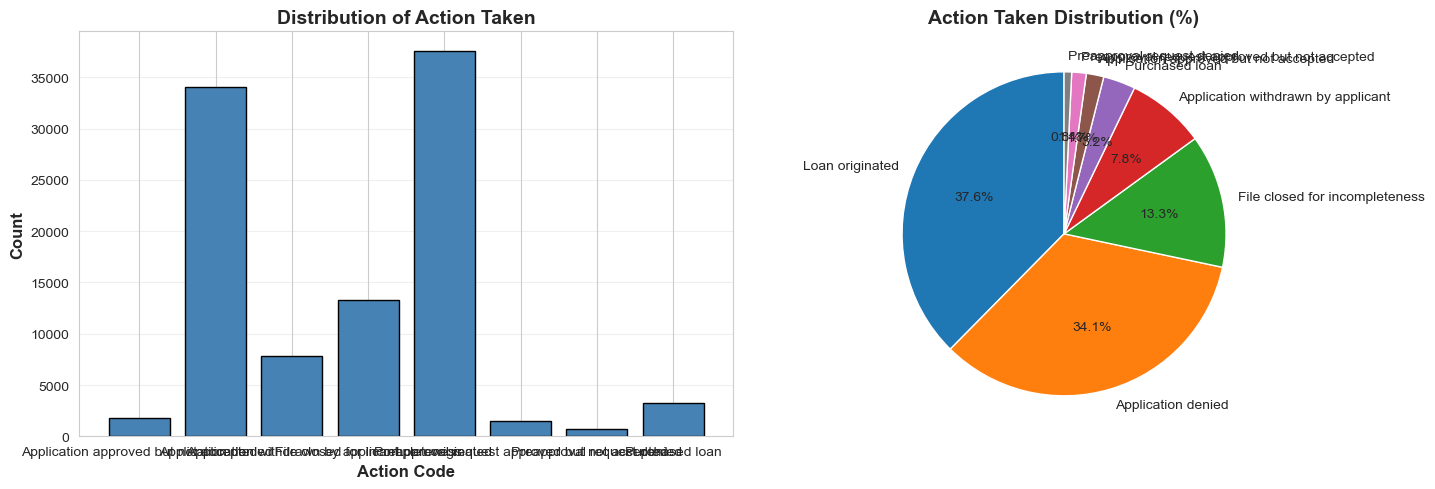

In [48]:
# Visualize action_taken distribution
if 'action_taken' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Bar chart
    action_counts = df['action_taken'].value_counts().sort_index()
    axes[0].bar(action_counts.index, action_counts.values, color='steelblue', edgecolor='black')
    axes[0].set_xlabel('Action Code', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
    axes[0].set_title('Distribution of Action Taken', fontsize=14, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Pie chart
    action_pct = df['action_taken'].value_counts()
    axes[1].pie(action_pct.values, labels=action_pct.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Action Taken Distribution (%)', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

## 7. Create Binary Target Variable

Transform `action_taken` into a binary classification target for our ML model.

**Target Encoding Strategy**:
- **Approved (1)**: Loan originated (1), Application approved but not accepted (2), Purchased loan (6)
- **Denied (0)**: Application denied (3)
- **Excluded (NaN)**: Withdrawn (4), Incomplete (5), Preapproval denied (7), Preapproval approved but not accepted (8)

We exclude withdrawn/incomplete applications because they don't represent actual approval decisions.

In [55]:
df.action_taken

0                              Loan originated
1                           Application denied
2        Application approved but not accepted
3                              Loan originated
4                              Loan originated
                         ...                  
99995                           Purchased loan
99996                       Application denied
99997                       Application denied
99998                       Application denied
99999               Preapproval request denied
Name: action_taken, Length: 100000, dtype: object

In [57]:
# Standardize column names to lowercase for consistency
df.columns = df.columns.str.lower()

# Verify action_taken column exists
if 'action_taken' not in df.columns:
    print("⚠️  ERROR: 'action_taken' column not found!")
    print(f"Available columns: {df.columns.tolist()[:10]}...")
else:
    # Create binary target variable using string values
    # Normalize strings to handle case variations
    df['target'] = df['action_taken'].str.lower().map({
        'loan originated': 1,
        'application approved but not accepted': 1,
        'purchased loan': 1,
        'application denied': 0,
        'application withdrawn by applicant': np.nan,
        'file closed for incompleteness': np.nan,
        'preapproval request denied': np.nan,
        'preapproval request approved but not accepted': np.nan
    })
    
    print("✅ Binary Target Variable Created Successfully!")
    print("=" * 70)
    print("\n📊 Target Encoding:")
    print("  • Approved (1): 'Loan originated', 'Application approved but not accepted', 'Purchased loan'")
    print("  • Denied (0): 'Application denied'")
    print("  • Excluded (NaN): Withdrawn, Incomplete, Preapproval requests")
    
    # Display distribution including NaN
    print("\n" + "=" * 70)
    print("TARGET DISTRIBUTION (All Records)")
    print("=" * 70)
    
    target_counts = df['target'].value_counts(dropna=False)
    target_pct = (target_counts / len(df) * 100)
    
    dist_df = pd.DataFrame({
        'Target': ['Denied (0)', 'Approved (1)', 'Excluded (NaN)'],
        'Count': [
            target_counts.get(0.0, target_counts.get(0, 0)),
            target_counts.get(1.0, target_counts.get(1, 0)),
            df['target'].isna().sum()
        ]
    })
    dist_df['Percentage'] = (dist_df['Count'] / len(df) * 100).round(2)
    
    print(dist_df.to_string(index=False))
    
    # Calculate metrics for modeling data only (excluding NaN)
    print("\n" + "=" * 70)
    print("CLASS BALANCE (Modeling Data - Excludes NaN)")
    print("=" * 70)
    
    valid_target = df['target'].dropna()
    
    if len(valid_target) > 0:
        n_approved = (valid_target == 1).sum()
        n_denied = (valid_target == 0).sum()
        approval_rate = (n_approved / len(valid_target)) * 100
        
        print(f"  Approved (1):  {n_approved:,} ({approval_rate:.2f}%)")
        print(f"  Denied (0):    {n_denied:,} ({100-approval_rate:.2f}%)")
        print(f"  Total:         {len(valid_target):,}")
        
        # Calculate imbalance ratio
        if n_denied > 0:
            imbalance_ratio = n_approved / n_denied
            print(f"\n  Imbalance Ratio (Approved:Denied): {imbalance_ratio:.2f}:1")
            
            # Assess class balance
            if imbalance_ratio > 2.0:
                print("\n  ⚠️  SIGNIFICANT CLASS IMBALANCE DETECTED")
                print("      → Will need to address in modeling phase (SMOTE, class weights, etc.)")
            elif imbalance_ratio < 0.5:
                print("\n  ⚠️  REVERSE CLASS IMBALANCE (More denials than approvals)")
            else:
                print("\n  ✅ CLASS BALANCE IS ACCEPTABLE for modeling")
    else:
        print("  ⚠️  No valid target values found!")
    
    print("\n" + "=" * 70)


✅ Binary Target Variable Created Successfully!

📊 Target Encoding:
  • Approved (1): 'Loan originated', 'Application approved but not accepted', 'Purchased loan'
  • Denied (0): 'Application denied'
  • Excluded (NaN): Withdrawn, Incomplete, Preapproval requests

TARGET DISTRIBUTION (All Records)
        Target  Count  Percentage
    Denied (0)  34077       34.08
  Approved (1)  42564       42.56
Excluded (NaN)  23359       23.36

CLASS BALANCE (Modeling Data - Excludes NaN)
  Approved (1):  42,564 (55.54%)
  Denied (0):    34,077 (44.46%)
  Total:         76,641

  Imbalance Ratio (Approved:Denied): 1.25:1

  ✅ CLASS BALANCE IS ACCEPTABLE for modeling



## 8. Check Data Types and Convert if Needed

In [58]:
# Review data types
dtype_summary = df.dtypes.value_counts()
print("Data Type Distribution:")
print("=" * 60)
print(dtype_summary)

# Check for numeric columns stored as objects
print("\nChecking for numeric columns stored as objects...")
object_cols = df.select_dtypes(include=['object']).columns

potentially_numeric = []
for col in object_cols:
    # Sample first non-null value
    sample = df[col].dropna().head(1).values
    if len(sample) > 0:
        try:
            float(str(sample[0]).replace(',', ''))
            potentially_numeric.append(col)
        except:
            pass

if potentially_numeric:
    print(f"\n⚠️  Potentially numeric columns stored as objects: {len(potentially_numeric)}")
    for col in potentially_numeric:
        print(f"  - {col}")
else:
    print("✅ No obvious type conversion issues detected")

Data Type Distribution:
object     74
int64      15
float64    13
Name: count, dtype: int64

Checking for numeric columns stored as objects...

⚠️  Potentially numeric columns stored as objects: 2
  - total_units
  - debt_to_income_ratio


In [65]:
# Fix data types
# df['income'] = df['income'].astype(float) / 1000 
df['interest_rate'] = df['interest_rate'].astype(float)
df['loan_amount'] = df['loan_amount'].astype(float)
df['combined_loan_to_value_ratio'] = df['combined_loan_to_value_ratio'].astype(float)

print(df.income.head())

0    147000.0
1     65000.0
2    502000.0
3    115000.0
4    258000.0
Name: income, dtype: float64


## 9. Duplicate Records Check

In [66]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
duplicate_pct = (duplicate_count / len(df)) * 100

print("Duplicate Records Analysis:")
print("=" * 60)
print(f"Total Duplicate Rows: {duplicate_count:,} ({duplicate_pct:.2f}%)")

if duplicate_count > 0:
    print("\n⚠️  Duplicates found - will need to investigate and handle in cleaning phase")
else:
    print("\n✅ No duplicate rows found")

Duplicate Records Analysis:
Total Duplicate Rows: 0 (0.00%)

✅ No duplicate rows found


## 10. Generate Comprehensive Data Profile Report

Using ydata-profiling to create a detailed HTML report

In [67]:
# Check if ydata-profiling is installed
try:
    from ydata_profiling import ProfileReport
    profiling_available = True
except ImportError:
    print("⚠️  ydata-profiling not installed")
    print("\nInstall with: pip install ydata-profiling")
    profiling_available = False

if profiling_available:
    print("✅ ydata-profiling is available")

✅ ydata-profiling is available


In [68]:
# Generate profile report
if profiling_available:
    print("Generating comprehensive data profile report...")
    print("⏳ This may take 5-15 minutes for large datasets...\n")
    
    # Sample if dataset is too large (>500k rows)
    if len(df) > 500000:
        print(f"Dataset has {len(df):,} rows - using sample of 500,000 for profiling")
        df_sample = df.sample(n=500000, random_state=42)
    else:
        df_sample = df
    
    # Create profile
    profile = ProfileReport(
        df_sample,
        title="HMDA Loan Data - 2024 Profile Report",
        explorative=True,
        minimal=False,
        correlations={
            "pearson": {"calculate": True},
            "spearman": {"calculate": True},
            "kendall": {"calculate": False},
            "phi_k": {"calculate": False}
        }
    )
    
    # Save report
    output_path = REPORTS / 'loan_data_profile_report.html'
    profile.to_file(output_path)
    
    print(f"\n✅ Profile report saved to: {output_path}")
    print("\nOpen the HTML file in your browser to view the full report.")
    print("The report includes:")
    print("  - Overview statistics")
    print("  - Variable distributions")
    print("  - Correlations")
    print("  - Missing values analysis")
    print("  - Sample data")
else:
    print("\n⚠️  Skipping profile report generation")
    print("Install ydata-profiling to generate the report: pip install ydata-profiling")

Generating comprehensive data profile report...
⏳ This may take 5-15 minutes for large datasets...



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 102/102 [00:17<00:00,  5.69it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


✅ Profile report saved to: /Users/josiahgordor/Desktop/DSPortfolio/Projects/loan_approval/reports/loan_data_profile_report.html

Open the HTML file in your browser to view the full report.
The report includes:
  - Overview statistics
  - Variable distributions
  - Correlations
  - Missing values analysis
  - Sample data


## 11. Summary of Findings

In [69]:
print("="*80)
print("TASK 1.2: INITIAL DATA EXPLORATION - SUMMARY")
print("="*80)

print(f"\n📊 Dataset Overview:")
print(f"  - Total Rows: {len(df):,}")
print(f"  - Total Columns: {len(df.columns)}")
print(f"  - Memory Usage: {df.memory_usage(deep=True).sum() / 1e6:.1f} MB")

print(f"\n🎯 Target Variable:")
if 'target' in df.columns:
    approval_rate = df['target'].mean() * 100
    print(f"  - Approval Rate: {approval_rate:.2f}%")
    print(f"  - Denial Rate: {100 - approval_rate:.2f}%")
    print(f"  - Class Imbalance Ratio: {df['target'].value_counts()[1] / df['target'].value_counts()[0]:.2f}:1")

print(f"\n❓ Missing Values:")
cols_with_missing = len(missing_df[missing_df['Missing_Percentage'] > 0])
cols_high_missing = len(missing_df[missing_df['Missing_Percentage'] > 40])
print(f"  - Columns with missing values: {cols_with_missing} / {len(df.columns)}")
print(f"  - Columns with >40% missing: {cols_high_missing}")

print(f"\n🔑 Key Features:")
print(f"  - Available: {len(available_features)} / {len(key_features)}")
if missing_features:
    print(f"  - Missing: {', '.join(missing_features[:3])}{'...' if len(missing_features) > 3 else ''}")

print(f"\n📝 Data Quality:")
print(f"  - Duplicate Rows: {duplicate_count:,}")
print(f"  - Data Types: {len(df.dtypes.value_counts())} unique types")

print(f"\n✅ Task 1.2 Completed!")
print(f"\n📄 Deliverables:")
if profiling_available:
    print(f"  ✅ Data profile report: reports/loan_data_profile_report.html")
else:
    print(f"  ⚠️  Data profile report: Not generated (install ydata-profiling)")

print(f"\n🔜 Next Steps:")
print(f"  - Task 1.3: Define target variable and business rules")
print(f"  - Phase 2: Data cleaning and preprocessing")

print("\n" + "="*80)

TASK 1.2: INITIAL DATA EXPLORATION - SUMMARY

📊 Dataset Overview:
  - Total Rows: 100,000
  - Total Columns: 102
  - Memory Usage: 494.1 MB

🎯 Target Variable:
  - Approval Rate: 55.54%
  - Denial Rate: 44.46%
  - Class Imbalance Ratio: 1.25:1

❓ Missing Values:
  - Columns with missing values: 33 / 102
  - Columns with >40% missing: 25

🔑 Key Features:
  - Available: 17 / 18
  - Missing: property_type

📝 Data Quality:
  - Duplicate Rows: 0
  - Data Types: 3 unique types

✅ Task 1.2 Completed!

📄 Deliverables:
  ✅ Data profile report: reports/loan_data_profile_report.html

🔜 Next Steps:
  - Task 1.3: Define target variable and business rules
  - Phase 2: Data cleaning and preprocessing



## 12. Save Exploration Summary

In [70]:
# Save key metrics to a summary file
import json
from datetime import datetime

summary = {
    'date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'task': 'Task 1.2: Initial Data Exploration',
    'dataset': {
        'rows': int(len(df)),
        'columns': int(len(df.columns)),
        'memory_mb': float(df.memory_usage(deep=True).sum() / 1e6)
    },
    'missing_values': {
        'columns_with_missing': int(cols_with_missing),
        'columns_high_missing_40pct': int(cols_high_missing)
    },
    'duplicates': int(duplicate_count),
    'key_features': {
        'available': available_features,
        'missing': missing_features
    }
}

if 'target' in df.columns:
    summary['target_variable'] = {
        'approval_rate': float(df['target'].mean()),
        'denial_rate': float(1 - df['target'].mean()),
        'approved_count': int(df['target'].sum()),
        'denied_count': int((df['target'] == 0).sum())
    }

# Save to file
summary_path = REPORTS / 'data_exploration_summary.json'
with open(summary_path, 'w') as f:
    json.dump(summary, f, indent=2)

print(f"✅ Exploration summary saved to: {summary_path}")

✅ Exploration summary saved to: /Users/josiahgordor/Desktop/DSPortfolio/Projects/loan_approval/reports/data_exploration_summary.json
